In [5]:
import numpy as np
import matplotlib.pyplot as plt
N =100
X = np.random.rand(N,1)
Y = np.sin(2* np.pi * X) + 0.4 * np.random.rand(N,1)


In [ ]:
import tensorflow as tf
W1 = tf.Variable(np.random.randn(1,100))
b1 = tf.Variable(np.random.randn(100))
W2 = tf.Variable(np.random.randn(100,100))
b2 = tf.Variable(np.random.randn(100))
W3 = tf.Variable(np.random.randn(100,1))
b3 = tf.Variable(np.random.randn(1))
def relu(x):
    return tf.where(x>=0,x,0)

lr = 0.0001
for epoch in range(7000):
    with tf.GradientTape() as tape:
        y = relu(X @ W1 + b1)
        y = relu(y @ W2 + b2)
        y = y @ W3 + b3
        loss = tf.reduce_mean((y - Y)**2)
    dW1 , db1 , dW2 , db2 , dW3 , db3 = tf.gradient(loss, (W1 , b1 , W2 , b2 , W3, b3))
    W1.assign_sub(lr * dW1) 
    b1.assign_sub(lr * db1)
    W2.assign_sub(lr * dW2)
    b2.assign_sub(lr * db2)
    W3.assign_sub(lr * dW3)
    b3.assign_sub(lr * db3)
    if epoch % 1000 == 0:
        print(loss.numpy())   

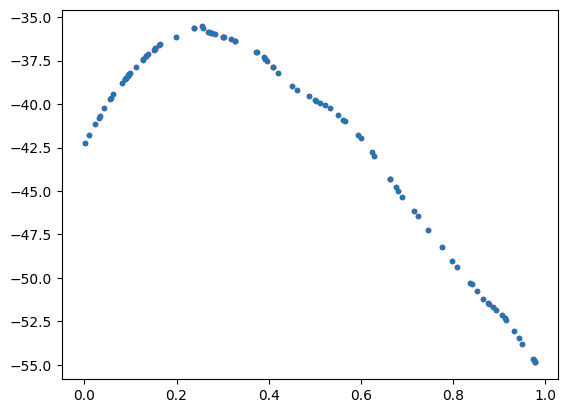

In [7]:
Z = relu(X @ W1 + b1)
Z = relu(Z @ W2 + b2)
Z = Z @ W3 + b3
plt.plot(X, Z, '.r')
plt.plot(X, Z, '.')
plt.show()